In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import scipy.io
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

/Users/eyshin/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/eyshin/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
subj_list_GA = ['GA01', 'GA02', 'GA05', 'GA07', 'GA08', 
                'GA11', 'GA12', 'GA13', 'GA14', 'GA15', 
                'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 
                'GA26', 'GA27', 'GA28', 'GA29', 'GA30', 
                'GA31', 'GA32', 'GA33', 'GA34', 'GA35',
                'GA36', 'GA37', 'GA38', 'GA42', 'GA44'] 

In [19]:
mrew = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/mrew_errR_30_run1to3_20190626.mat')

In [26]:
mrew_data = {}

for subj in subj_list_GA:
    mrew_data[subj] = mrew['%s_mrew_all' % subj][0]

In [27]:
mrew_data['GA32']

array([0.13333333, 0.41861111, 0.39611111, 0.45055556, 0.40138889,
       0.39916667, 0.39916667, 0.36555556, 0.43916667, 0.45555556,
       0.41666667, 0.3575    , 0.38166667, 0.50694444, 0.50138889,
       0.4475    , 0.4175    , 0.46333333, 0.45527778, 0.49972222,
       0.41944444, 0.46444444, 0.45027778, 0.4225    , 0.39138889,
       0.54083333, 0.54972222, 0.61277778, 0.63638889, 0.69138889,
       0.72194444, 0.71638889, 0.55583333, 0.61305556, 0.68638889,
       0.67722222, 0.64305556, 0.70055556, 0.70972222, 0.72      ,
       0.68555556, 0.65694444, 0.70444444, 0.67361111, 0.69472222,
       0.70083333, 0.70833333, 0.70222222, 0.49944444, 0.64527778,
       0.65694444, 0.68805556, 0.75555556, 0.75027778, 0.69805556,
       0.73222222, 0.61277778, 0.72694444, 0.74611111, 0.77722222,
       0.735     , 0.75333333, 0.70388889, 0.70555556, 0.60777778,
       0.69611111, 0.68666667, 0.56472222, 0.6925    , 0.64666667,
       0.64972222, 0.72027778, 0.59083333, 0.58027778, 0.72694

In [28]:
df = pd.DataFrame(columns=['subj', 'x', 'y', 'run'])

for subj in subj_list_GA:
    index = 0
    
    for i, y in enumerate(mrew_data[subj]):
        df = df.append({'subj': subj, 'x': float(index / 24), 'y': y, 'run': int(i // 24) + 1}, ignore_index=True)
        index += 1

In [29]:
df.head()

,subj,x,y,run
0,GA01,0.000000,0.225833,1
1,GA01,0.041667,0.221389,1
2,GA01,0.083333,0.370833,1
3,GA01,0.125000,0.316389,1
4,GA01,0.166667,0.341389,1


In [30]:
min(df['y']), max(df['y'])

(0.0022222222222222222, 0.8944444444444444)

In [31]:
len(df[df['subj'] == 'GA01'])

168

In [32]:
def exponential_fit(x, a, b, c):
    return a * (1 - np.exp(-b * x)) + c

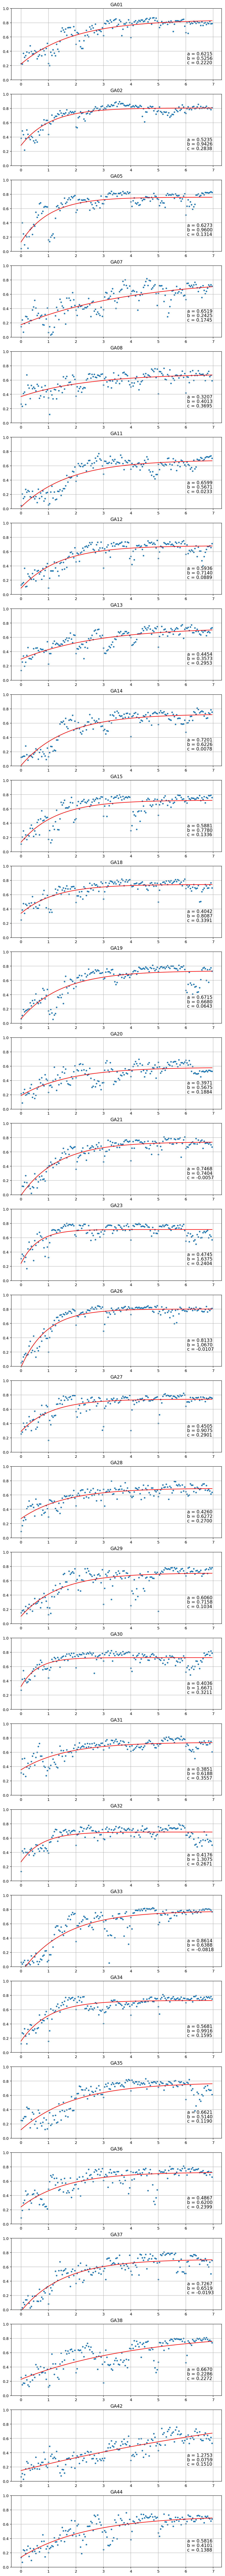

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 125)
fit_results = []

for i, subj in enumerate(subj_list_GA):
    
    sub_df = df[df['subj'] == subj]
    x = list(sub_df['x'])
    y = list(sub_df['y'])
    
    popt, pcov = scipy.optimize.curve_fit(exponential_fit, x, y)
    
    plt.subplot(30, 1, i+1)
    plt.grid(True)
    plt.scatter(x, y, marker='.')
    plt.plot(x, exponential_fit(np.array(x), *popt), color='red')
    plt.title(subj)
    plt.text(6.05, 0.345, 'a = %.4f' % (popt[0]), fontsize=12)
    plt.text(6.05, 0.2825, 'b = %.4f' % (popt[1]), fontsize=12)
    plt.text(6.05, 0.22, 'c = %.4f' % (popt[2]), fontsize=12)
    plt.ylim(0, 1)
    fit_results.append((popt, pcov))

plt.show()